## IMPLEMENTING SGD FROM SCATCH AND COMPARING IT WITH SGD REGRESSOR

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

##LOADING THE BOSTON DATASET WHICH IS READILY AVAIABLE IN GOOGLE COLAB ADN IMPLEMENTING MODEL ON TOP OF IT

In [0]:
X = load_boston().data
Y = load_boston().target

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [54]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## USING STANDARD SCALER STANDARDISING THE DATA OF THE X

In [0]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
clf = SGDRegressor(n_iter=1000)
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

23.059860379742734


In [40]:
clf

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [0]:
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [7]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
Y.head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

## SPLITTING THE DATA INTO TRAIN AND TEST BEFORE DEPLOYING INTO THE MODELS 

In [0]:
from sklearn.model_selection import train_test_split
xtrain ,xtest ,ytrain ,ytest = train_test_split(X ,Y ,random_state = 0, test_size = 0.3)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

## WRITING THE FUNCTION TO IMPLEMENT THE SGD REGRESSOR

In [0]:
def sgd(X, y, niter ,r):
    b = 0
    n = len(X)
    w = np.random.normal(loc = 0.0 ,scale =1.0 ,size = (X.shape[1],))
    for i in range(niter):
        totalerror = []
        for j in range(len(X)):
            y_p = np.array(X[j]).dot(w) + b
            error = y.iloc[j] - y_p
            totalerror.append(error)
            
        w = w - r*((-2/n)*X.T.dot(totalerror))
        b = b - r*((-2/n)*np.sum(totalerror))
    return w ,b

In [0]:
opt_w , opt_b = sgd(xtrain,ytrain,10000,0.001)

In [13]:
print("The Optimal Coefficient is",opt_w)
print("The Optimal Intercept is",opt_b)

The Optimal Coefficient is [-0.94864569  0.9247058  -0.21189765  0.66386768 -1.72170669  2.79213908
 -0.34721065 -3.0201566   1.31932692 -1.03947224 -2.22796961  0.57434953
 -3.40129503]
The Optimal Intercept is 22.745480180036335


## OBTAINED THE COEFFICIENTS AND INTERCEPTS FOR THE SGD.

In [14]:
predictedy = xtest.dot(opt_w) + opt_b
err = ytest - predictedy
MSEofsgd = (np.sum(err**2)/xtest.shape[0])
RMSEofsgd = np.sqrt(MSEofsgd)
print("MSE is",MSEofsgd)
print("RMSE is",RMSEofsgd)

MSE is 27.642520276585294
RMSE is 5.257615455373785


##USING THE SCIKIT LEARN MODEL FOR IMPLEMENTATION

In [42]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor
sgd= SGDRegressor(n_iter=1000,alpha=0.01)
sgd.fit(xtrain,ytrain)
coef_ = sgd.coef_
print("The Coefficient is",coef_)
intercept = sgd.intercept_
print("The Intercept is",intercept)

The Coefficient is [-0.97430289  0.98916735 -0.01229955  0.64232458 -1.74674731  2.73364115
 -0.29462013 -2.96792251  1.82947848 -1.63062996 -2.22788556  0.58173399
 -3.38414018]
The Intercept is [22.74676436]


In [43]:
sgd

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=1000, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [44]:
import numpy as np
y_pred = sgd.predict(xtest)
error = ytest - y_pred
MSE = (np.sum(error**2)/xtest.shape[0])
RMSE = np.sqrt(MSE)
print("MSE is",MSE)
print("RMSE is",RMSE)

MSE is 27.338102408275493
RMSE is 5.228585124895213


COMPARING THE WEIGHTS FROM THE SCIKIT LEARN MODEL AND WEIGHTS FROM SCRATCH

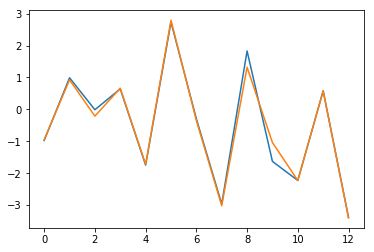

In [45]:
fig,ax=plt.subplots()
ax.plot(sgd.coef_)
ax.plot(opt_w)
plt.show()

In [32]:
print(xtrain.shape[1])

13


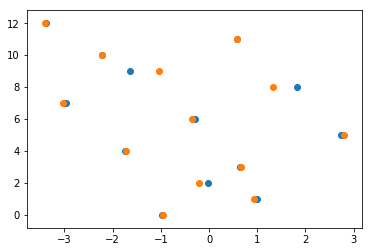

In [46]:

plt.scatter(sgd.coef_,range(0,13))
plt.scatter(opt_w,range(0,13))
plt.show()

In [48]:
data = [[27.41,5.23], [27.3,5.22]]
pd.DataFrame(data, columns=["MSE", "RMSE"],index=['sgd from scratch','sgd sklearn'])

,MSE,RMSE
sgd from scratch,27.41,5.23
sgd sklearn,27.30,5.22


In [47]:
#comparing the weights
ss=pd.DataFrame()
ss['weights_of_sgdfromscratch']=sgd.coef_
ss['sgd regressor weights']=opt_w
ss

,weights_of_sgdfromscratch,sgd regressor weights
0,-0.974303,-0.948646
1,0.989167,0.924706
2,-0.012300,-0.211898
3,0.642325,0.663868
4,-1.746747,-1.721707
5,2.733641,2.792139
6,-0.294620,-0.347211
7,-2.967923,-3.020157
8,1.829478,1.319327
9,-1.630630,-1.039472


## DOCUMENTATION AND CONCLUSION
###WE HAVE ONTAINED THE BOSTON DATA A TO PREDICT THE HOUSE PRICE. THE TWO MODELS WE USED ARE SGD FUNCTION WRITTEN FROM SCRATCH AND OTHER SGD REGRESSOR MODEL OF SCIKIT LEARN,.
## WE OBTAINED THE WEGHTS AND COMAPARED THE WEIGHTS USING GRAPH AND VISUALISED IT. COMAPARED THE PERFORMANCE USING THE PANDAS DATAFRAME.
## we plotted the weghts on the scattere plot and visualised the difference between them.
## for comparsion of weights we also compared using the dataframe.
##in boston data we are provided with features ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT'] 
 ## with these features we have the values to predict the house price , since the problem is regression we dont have the exact classs labels . we train a regression model on top of this using sgd regressor whisch is the stochastic gradient regressor with square loss and we measure the performance using the rmse metric. lower the rmse value higher the performance of the model. we predict the house price